In [2]:
#IMPORT DES LIBRAIRIES
import numpy as np
import matplotlib.pyplot as plt
import Project_Library as pl

# 1. Projet Python : Simulation de circuits R,L,C 
## 1.1. Introduction :
Dans le vaste domaine de l'ingénierie électrique, chaque circuit complexe révèle un ensemble unique de défis et de découvertes. Notre projet s'inscrit dans cette quête passionnante, visant à explorer les réponses temporelles de circuits électriques, en mettant en lumière l'intrigue et la complexité des éléments de premier ordre (RC, RL, CR, LR) et de deuxième ordre (RLC, RCL, etc.). Sous l'impact différentes d'excitations, ces circuits révèlent des comportements fascinants qui transcendent la théorie pour trouver des applications tangibles et des implications concrètes.

## 1.2. Objectif  :
Ce projet vise à simuler et analyser les réponses temporelles de circuits électriques complexes, comprenant des éléments de premier ordre (RC, RL, CR, LR) et de deuxième ordre (RLC, RCL, etc.), soumis à une excitation sinusoïdale. L'objectif est de déduire la nature de chaque filtre, comprendre son fonctionnement, et explorer l'impact des méthodes numériques de résolution d'équations différentielles (Euler, Runge-Kutta 2, Runge-Kutta 4) sur la convergence des résultats. En ajustant le pas de temps à l'aide de l'interpolation, nous cherchons à garantir la stabilité des simulations. De plus, nous considérerons l'introduction de suiveurs pour découpler les circuits en cascade, explorant ainsi l'influence de cette configuration sur le comportement global du système électrique.

## 1.3. Table des matières : 
- 1.Presentation
  - 1.1 Introduction
  - 1.2 Objectif
  - 1.3 Table des matieres
- 2.Interactions avec fichiers
  - 2.1 La fonction SauvgardeFonction
- 3.Circuit du premier ordre
  - 3.1 
  - 3.2 
  - 3.3 
  - 3.4 
- 3.Circuit du second ordre
  - 3.1 
  - 3.2 
  - 3.3 
  


# 2. Explication du fonctionnement des Interactions avec fichiers

## 2.1. La fonction SauvgardeFonction
Pour sauvegarde un fichier de tension d'entrée sous la forme .npy on utilise la fonction Sauvgardefichier décrite dans Project_Library.


Cette fonction prend en entrée les deux vecteurs t et v et le chemin du fichier souhaité . La fonction sauvegarde le fichier dans le chemin specifie, par exemple pl.SauvegardeFonction(t,v,'data/cosinus.npy') crée un fichier de format .npy dans le dossier data avec le nom 'cosinus.npy'

In [2]:
t = np.linspace(0, 0.05, int(6))
v = np.ones(len(t))

pl.SauvegardeFonction(t,v,'data/crenau.npy')

Data saved to data/crenau.npy


## 2.2. La fonction LireFichier
Le fichier d'entrée doit être au format .npy contenant deux vecteurs temps et tension (comme définit dans la fonction SauvgardeFonction). \
La fonction LireFichier est une fonction qui prends en entrée l'emplacement du fichier d'entrée .npy et renvoie en sortie deux vecteur t et v. 

In [3]:
t,e=pl.LireFichier("data/crenau.npy")

print(f'{t} \n{e}')

[0.   0.01 0.02 0.03 0.04 0.05] 
[1. 1. 1. 1. 1. 1.]




## 2.3. Syntaxe des fichiers contenant les infomations du circuit
Le fichier doit être au format texte (.txt) et doit contenir les informations du circuit : ordre, type du filtre , les valeurs de R,L, et C. \
Le fichier texte doit être décrit avec une forme définit pour pouvoir lire les informations du circuit .\
Si le circuit est d'ordre 1 , le fichier text doit être décrit comme suit :



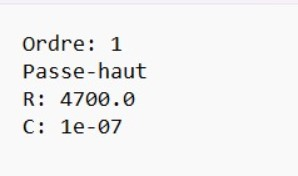


Première ligne : ordre \
Deuxième ligne : type du filtre \
Troisième ligne : valeur de R \
Quatrième ligne : valeur de C ou L (la fonction InfosCircuit peut distinguer s'il s'agit de C ou L)


Si le circuit  est d'ordre 2 , le fichier texte doit être décrit comme suit

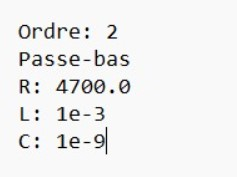

Première ligne : ordre \
Deuxième ligne : type du filtre (Passe bas , haut, bande) \
Deuxième ligne : valeur de R \
Troisième ligne : valeur de L \
Quatrième ligne : valeur de C  

NB: les majuscules (telles que le "P" dans "Passe-bas" ou R, L et C) doivent être respectées pour le bon fonctionnement des fonctions

# 3. Circuit du 1er Ordre
## 3.1. Equations Différentielles 1ère Ordre  : 

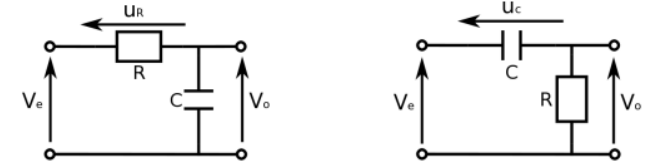



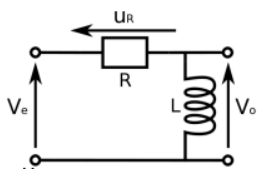
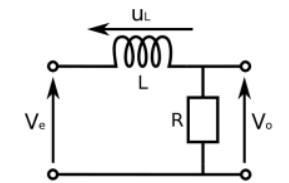

- 1. circuit RC série : 
<br>
\[
\frac{{dU_C(t)}}{{dt}} = -\frac{1}{{RC}}U_C(t) + \frac{1}{{RC}}V_e(t)
\]
 

- 2. circuit CR série : 
<br>
\[
\frac{{dU_R(t)}}{{dt}} = -\frac{1}{{RC}}U_R(t) + \frac{{dV_e(t)}}{{dt}}
\]


- 3. circuit RL série : 
<br>
\[
\frac{{dU_L(t)}}{{dt}} = -\frac{R}{{L}}U_L(t) + \frac{{dV_e(t)}}{{dt}}
\]


- 4. circuit LR série : 
<br>
\[
\frac{{dU_R(t)}}{{dt}} = -\frac{R}{{L}}U_R(t) + \frac{R}{{L}}V_e(t)
\]


On remarque qu'on peut considerer que les differente equations se resument à une equation avec un élement qui different d'une equation à une autre . cette élement on l'appel U et il est en fonction de l'entré e(t) ou de sa dérivée 

L'equation génerale s'ecrit :

<br>
\[
\frac{{dS(t)}}{{dt}} = -\frac{1}{{\tau}}S(t) + U
\]

Pour caculer la valeur de U on utilise la fonction ConstanteCircuitOrdre1 définit dans project_library qui prend en entrée
<br>
- L'entrée : e(t) 
- Le pas : h 
- La constante du temps : \( \tau ) 
- Le type du circuit : "Passe-bas"  (Vout etant la sortie Uc ou Ur dans les circuits RC ou RL respectivement) ou bien "Passe-haut" (Vout etant la sortie Ur ou Ul dans les circuits RC ou RL respectivement)


et qui retourne la valeur de U pour l'equation considérée

Pour resoudre cette equation on vas l'ecrire sous la forme d'un probleme de cauchy
$$\left\{ \begin{array}{l}
y'\left( t \right) = f\left( {t,y\left( t \right)} \right)\\
y\left( {{t_0}} \right) = {y_0}
\end{array} \right.$$
avec : 

<br>
\begin{equation*}
F(t, y)   = -\frac{1}{{\tau}}y(t) + U
\end{equation*}
et : 
\begin{equation*}
y(t) = S(t) 
\end{equation*}

On a considérer que y(0)=0 valeur par defaut 




## 3.2. Résoulution des équations diférentielles :  
 

Pour résoudre l'équation differentielle écrite sous la forme d'un probléme de cauchy on utilise 03 méthodes de resolution des equations differentielles ordinaires: \
- 1-Euler :

\begin{align*}
    \left\{
    \begin{array}{l}
      S_0 \\
      S_{i+1}=S_i+f(t_i,y_i)
    \end{array}
    \right.
\end{align*}
- 2-Range kutta 2 :

\begin{align*}
    \left\{
    \begin{array}{l}
       S_0 \\
       K1=\frac{{-1}}{{\tau}}.S_i+U_i \\
       K2=\frac{{-1}}{{\tau}}.(S_i+h.K1)+U_i \\
       S_{i+1}=S_i+\frac{{h}}{{2}}.(K1+K2)
    \end{array}
    \right.
\end{align*}



- 3-Range kutta 4 :
 
 

\begin{align*}
    \left\{
    \begin{array}{l}
        S_0 \\
        K1 = h \cdot \left( -\frac{1}{\tau} \cdot S_{i} + U_{i} \right) \\
        K2 = h \cdot \left( -\frac{1}{\tau} \cdot \left(S_{i} + 0.5 \cdot K1\right) + U_{i} \right) \\
        K3 = h \cdot \left( -\frac{1}{\tau} \cdot \left(S_{i} + 0.5 \cdot K2\right) + U_{i} \right) \\
        K4 = h \cdot \left( -\frac{1}{\tau} \cdot \left(S_{i} + K3\right) + U_{i} \right) \\
        S_{i+1} = S_{i} + \frac{1}{6} \cdot \left( K1 + 2 \cdot K2 + 2 \cdot K3 + K4 \right)
    \end{array}
    \right.
\end{align*}


## 3.3. Étude de convergence des méthodes de résolution des Edo's

On vas simuler un circuit d'ordre 1 pour étudier la convergence des méthodes. (Euler, Range kuta 2 et Range kuta 4) pour un pas de temps de 1e-4s

/home/jupyter-6237/projet_MN/Project_Library.py:153: RuntimeWarning: overflow encountered in double_scalars
  s[i]=s[i-1] * ( 1-h/Tau) + h*U[i-1]
/home/jupyter-6237/projet_MN/Project_Library.py:171: RuntimeWarning: overflow encountered in double_scalars
  k2 = (-1/tau)*(s[i-1]+h*k1)+U[i-1]
/home/jupyter-6237/projet_MN/Project_Library.py:171: RuntimeWarning: invalid value encountered in double_scalars
  k2 = (-1/tau)*(s[i-1]+h*k1)+U[i-1]
/home/jupyter-6237/projet_MN/Project_Library.py:191: RuntimeWarning: overflow encountered in double_scalars
  K3= h* ((-1/Tau)* (s[i-1]+0.5*K2)  +U[i-1])
/home/jupyter-6237/projet_MN/Project_Library.py:193: RuntimeWarning: invalid value encountered in double_scalars
  s[i]=s[i-1] + (1/6) * ( K1+2*K2+2*K3+K4)


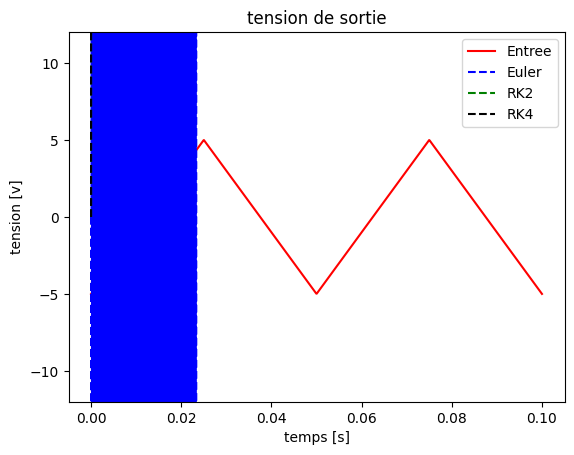

In [4]:
FichierCircuit='data/fRC.txt'
FichierEntree='data/vIn.npy'

t,e=pl.LireFichier(FichierEntree)

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

On remarque que les 03 méthodes diverges et cela est dû au pas h qui représente la distance entre 2 points successifs . Chaque méthode possède une valeur de h maximale pour converger.

On va essayer de réduire ce pas avec une méthode d'interpolation qui est le Spline cubique d'ordre 1 qui ajoute des points entre chaque deux points successifs.

## 3.4. Étude de convergence des méthodes de résolution des Edo's avec interpolation

On vas interpoler le signal d'entrée à l'aide de la méthode de range kuta 1 . Et pour cela on utilise la fonction InterpolationSpline1 qu'on a décrit dans project_library

Cette fonction prend en entrée le vecteur de temps et le vecteur de la tension d'entrée ainsi que le pas h souhaité. On obtient en sortie les nouveaux vecteurs 't' et 'e' ainsi que le pas 'h' 

le nouveau pas de temps: H=5.0005000500050007e-08


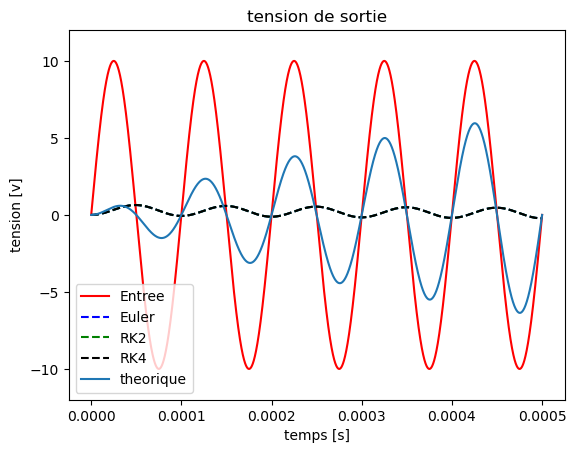

In [14]:
FichierCircuit='data/fRC_pb.txt'
FichierEntree='data/sinus10khz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1.001e-6) 

print(f"le nouveau pas de temps: H={t[1]-t[0]}") 

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.plot(t,(1-np.exp(-t/4.7e-4))*e, label='theorique')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Ceci est un circuit RC passe-bas avec tau=4.7e-5

On diminuant h les 03 méthodes convergent pour une valeur de pas minimale:
    le h minimum pour la convergence est 1.001e-5 s

=> Apres plusieur test on peur conclure qu'il faut une pas plus petit que 2 tau pour une convergence des methodes

L'interpolation est donc nécessaire pour étudier les réponses des circuits quand on a des vecteurs d'entrée avec un grand pas d'interpolation.

Remarque :
Les méthodes d'Euler et de range kuta 2 nécessite un pas h plus petit que la méthode de range kuta 4 et donc cette dernière est meilleurs pour résoudre les équations différentielles 

## 3.5. Comparaison avec la solution theorique
On etudie le circuit Rc passe-bas et on compare les résultats obtenu avec notre programme avec la sortie obtenue avec le logiciel Pspice
La valeur de la resistance est égale a 4700 
La valeur de la capacité est egale a 1e-7

On fait rentrer un sinus de fréquence 10Khz et d'amplitude 10


Le resultat obtenue sur pspice 


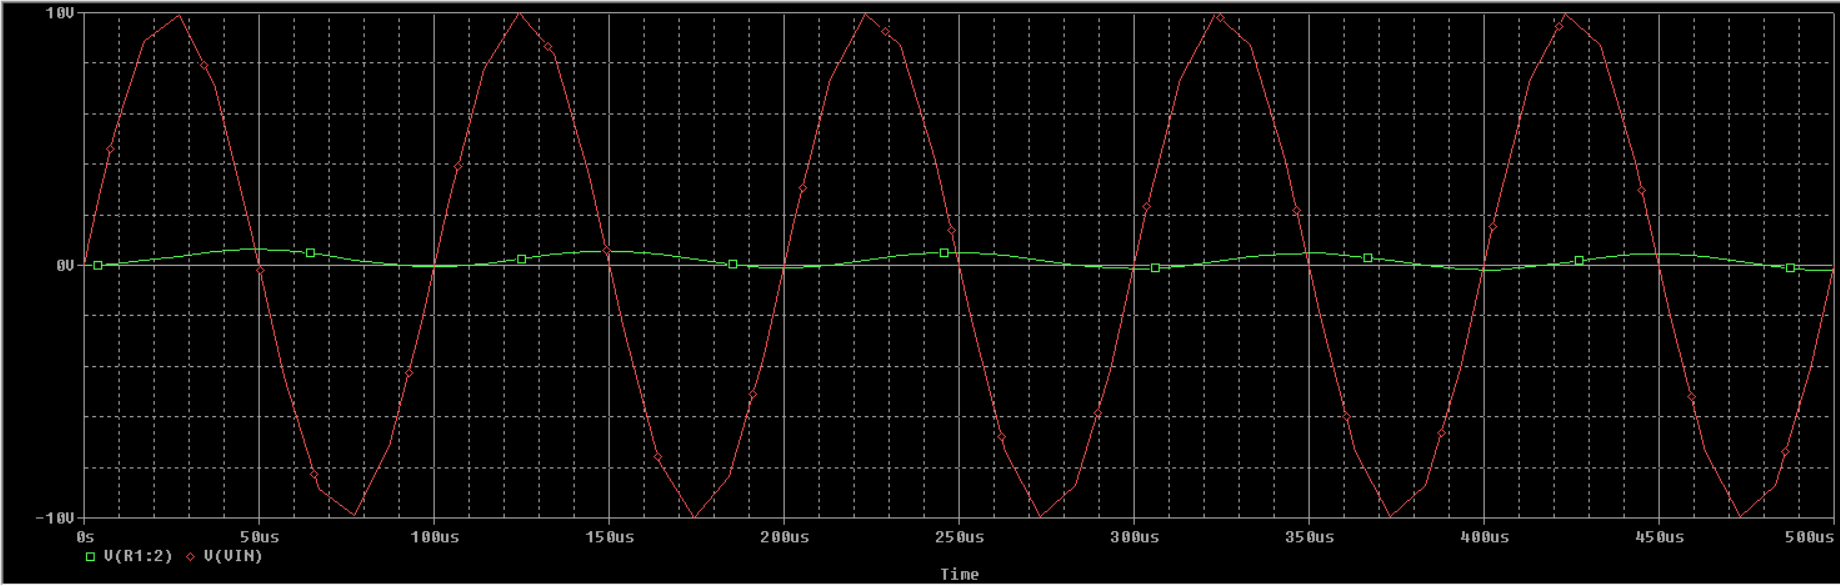


On remarque que le signal de sortie (en vert) est diminué et déphasé à cause de la fréquence élevée du signal d'entrée par rapport à la fréquence de coupure du filtre passe bas qui est d'environ 300 hz

Maintenant, on le compare avec le résultat obtenu avec notre programme

frequence de coupure: 338.62753849339435 hz


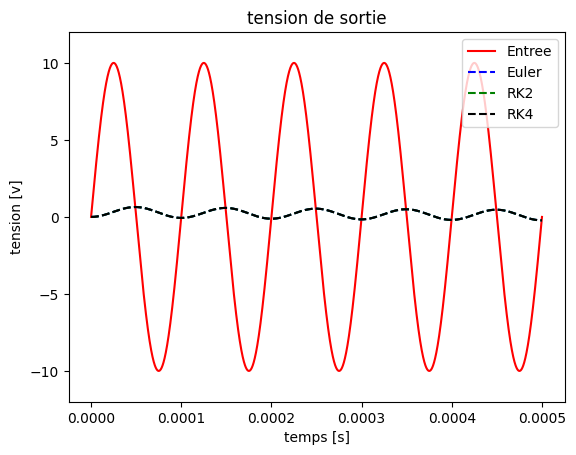

In [6]:

FichierCircuit='data/fRC_pb.txt'
FichierEntree='data/sinus10khz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1.1e-5)


t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')

plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

On Remarque qu'on obtient le résultat attendu diminution d'amplitude et un déphasage  \
Le signal de sortie est similaire à celui obtenu sur Pspice

## 3.6. Étudier les fonctions de transferts des circuits ordre 1

On vas étudier les réponses des circuits RC,CR,RL,LR pour une entrée sinus d'amplitude 10 V et de fréquence 1khz et 10 khz
Les valeurs des résistances, condensateur et inductance qu'on va traiter dans cette étude sont de : \


Pour les circuit RC: \
R=4.7 kΩ \
C=100 nF \
Pour les circuit RL: \
R=1.2 kΩ \
L=200 mH

### 3.6.1. Circuit RC passe bas
On fait entré un sinus de frequence 10 khz 

frequence de coupure: 338.62753849339435 hz


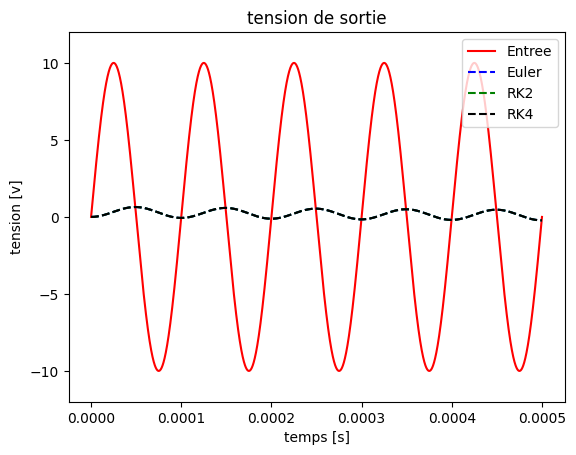

In [7]:

FichierCircuit='data/fRC_pb.txt'
FichierEntree='data/sinus10khz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1.1e-5)


t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

La réponse du circuit :
Diminution d'amplitude en sortie. On conclus que le signal a été filtré. 

Si maintenant, on fait entrer un sinus de fréquence 100 Hz 

frequence de coupure: 338.62753849339435 hz


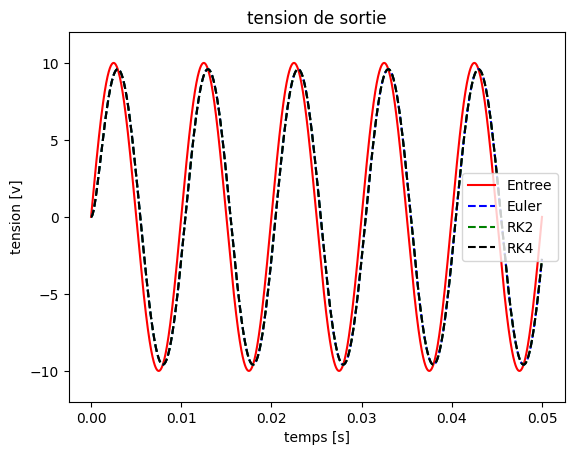

In [8]:
FichierCircuit='data/fRC_pb.txt'
FichierEntree='data/sinus100hz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1.1e-5)


t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :
Le signal de sortie est égale à celui d'entrée en module mais avec un déphasage.

Conclusion
Le signal n'as pas été filtré, car sa fréquence est inférieure à la fréquence de coupure du filtre et le filtre est un passe bas.

### 3.6.2. Circuit RC passe haut (tension aux bornes de R)
Réponse pour un sinus de fréquence 10 kHz

frequence de coupure/resonance: 338.62753849339435


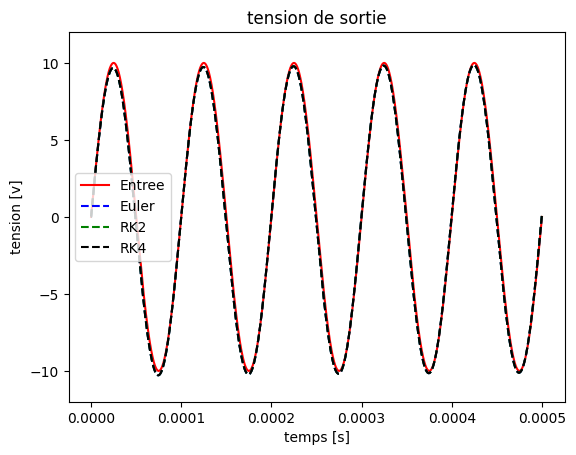

In [9]:
FichierCircuit='data/fRC_ph.txt'
FichierEntree='data/sinus10khz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1.1e-5)   


t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :
On remarque que pour une entrée de fréquence 10khz le signal n'as pas été filtré.

Réponse pour un sinus de fréquence 100hz

frequence de coupure/resonance: 338.62753849339435


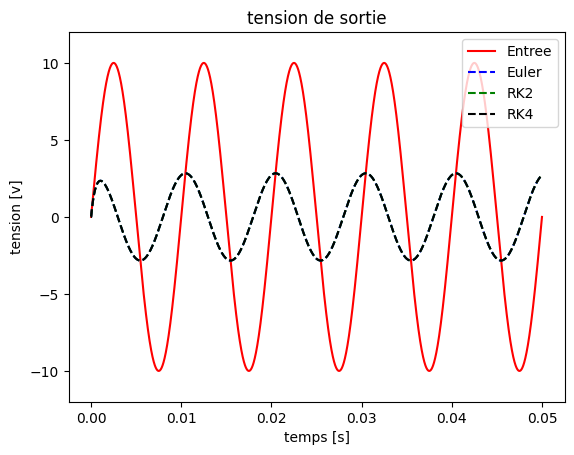

In [10]:
FichierCircuit='data/fRC_ph.txt'
FichierEntree='data/sinus100hz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1.1e-5)   


t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :
On remarque que pour une entré de frequence 100hz le signal as été filtré 


Conclusion :
Le filtre est un passe haut

### 3.6.3. Circuit RL passe bas (tension au borne de R)

Pour une entré sinus de 10 khz

frequence de coupure: 954.929658551372 hz


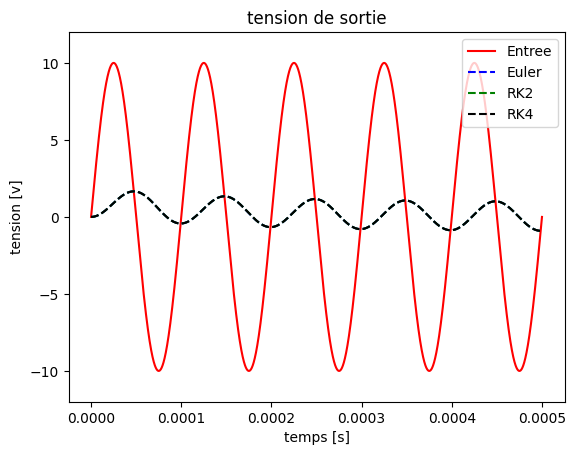

In [11]:
FichierCircuit='data/fRL_pb.txt'
FichierEntree='data/sinus10khz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree



t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :

Filtrage du signal et diminution d'amplitude


Pour une entré sinus de frequence 100 hz

frequence de coupure: 954.929658551372 hz


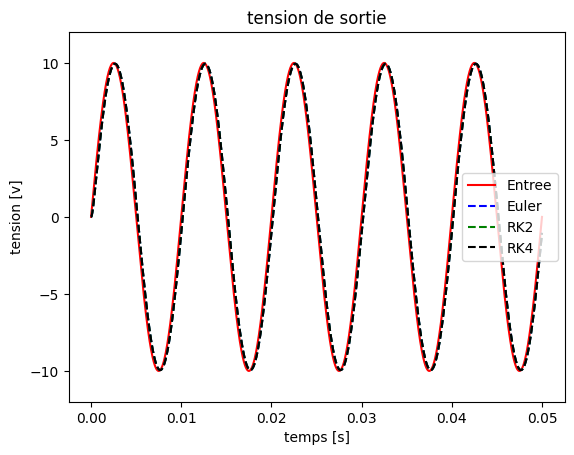

In [12]:
FichierCircuit='data/fRL_pb.txt'
FichierEntree='data/sinus100hz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-6)   #interpolation de l'entree



t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :
Le signal n'as pas été filtré 

Le circuit est un filtre passe bas

### 3.6.4. Circuit RL passe haut(tension au borne de L)

Pour une entrée sinus de fréquence 10khz

frequence de coupure: 954.929658551372 hz


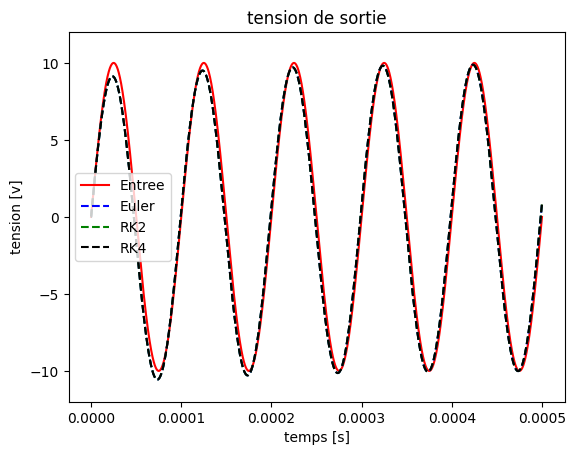

In [13]:
FichierCircuit='data/fRL_ph.txt'
FichierEntree='data/sinus10khz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree



t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :
le signal n'as pas été filtré 


Pour une entréz sinus de 100 Hz

frequence de coupure: 954.929658551372 hz


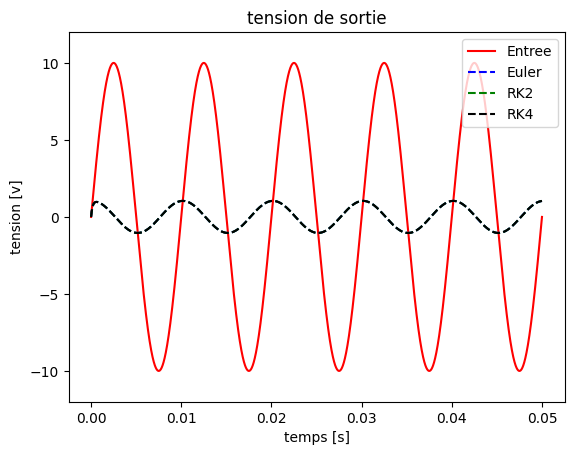

In [14]:
FichierCircuit='data/fRL_ph.txt'
FichierEntree='data/sinus100hz.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-6)   #interpolation de l'entree



t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure: {fc} hz')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Réponse du circuit :
Diminution d'amplitude et filtrage du signal

Conclusion :
Le circuit représente un filtre passe-haut 

# 4. Circuit RLC (2ème Ordre)  : 

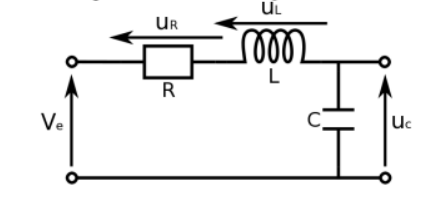

- 1. circuit RLC série tension aux bornes du condensateur : 
<br>
\[
\frac{{d^2U_C}}{{dt^2}} = -\frac{R}{L}\frac{{dU_C}}{{dt}} -\frac{1}{CL}U_C + \frac{1}{CL}V_e(t)
\]

- 2. circuit RLC série tension aux bornes de l'inductance : 
<br>
\[
\frac{{d^2U_L}}{{dt^2}} = -\frac{R}{L}\frac{{dU_L}}{{dt}} -\frac{1}{CL}U_L + \frac{{d^2V_e(t)}}{{dt^2}}
\]

- 3. circuit RLC série tension aux bornes de la résistance : 
<br>
\[
\frac{{d^2U_R}}{{dt^2}} = -\frac{R}{L}\frac{{dU_R}}{{dt}} -\frac{1}{CL}U_R + \frac{R}{{L}}V_e(t)
\]
<br>
On remarque qu'on peut considérer que les différentes équations se résument à une équation avec un élément qui diffère d'une équation à une autre. Cet élément, que l'on appelle \( S \), dépend de l'entrée \( U \) ou de sa première dérivée ou de sa seconde, selon la nature du filtre.
          L'équation générale s'écrit :
 
<br>
\[
\frac{{d^2S}}{{dt^2}} = -\frac{R}{L}\frac{{dS}}{{dt}} -\frac{1}{CL}S + U
\]

Pour caculer la valeur de \( U \) on utilise la fonction ConstanteCircuitOrdre2 définit dans project_library qui prend en entrée

- L'entrée : e(t) 
- Le pas : h 
- TypeCircuit :passe bas , passe haut , passe bande 
- Les valeurs de R,L,C
et qui retourne la valeur de E pour l'equation considérée

Pour resoudre cette equation on vas l'ecrire sous la forme d'un probleme de cauchy : 

$$\left\{ \begin{array}{l}
y'\left( t \right) = f\left( {t,y\left( t \right)} \right)\\
y\left( {{t_0}} \right) = {y_0}
\end{array} \right.$$
 avec 
 <br>
\begin{equation*}
F(t, y) = \begin{bmatrix}
\frac{dS}{dt} \\
-\frac{R}{L}\frac{dS}{dt} - \frac{1}{LC}s(t) + U
\end{bmatrix}
\end{equation*}

et 

\begin{equation*}
y(t) = \begin{bmatrix}
S(t) \\
\frac{dS}{dt}
\end{bmatrix}
\end{equation*}


<br>
On a considérer que \( y(0)=[0,0] \) valeur par defaut .


## 4.1 L'étude de la convergence  :
Pour l'étude de la convergence des méthodes de résolution des équations différentielles, nous avons choisi un filtre passe-bas du 2ᵉ ordre afin de réaliser divers tests.
### 4.1.1. Simulation filtre passe bas 2ème ordre :

/home/jupyter-6237/projet_MN/Project_Library.py:250: RuntimeWarning: overflow encountered in double_scalars
  y1[i]=y1[i-1] + (h*((-(R/L)*y1[i-1])-((1/(L*C))*y0[i-1])+u[i-1]))
/home/jupyter-6237/projet_MN/Project_Library.py:250: RuntimeWarning: invalid value encountered in double_scalars
  y1[i]=y1[i-1] + (h*((-(R/L)*y1[i-1])-((1/(L*C))*y0[i-1])+u[i-1]))
/home/jupyter-6237/projet_MN/Project_Library.py:271: RuntimeWarning: overflow encountered in double_scalars
  k1_1 = h * (-R/L * y1[i] - 1/(L*C) * y0[i] + U[i])
/home/jupyter-6237/projet_MN/Project_Library.py:277: RuntimeWarning: invalid value encountered in double_scalars
  y1[i+1] = y1[i] + 0.5 * (k1_1 + k2_1)


frequence de coupure/resonance: 50329.21210448704


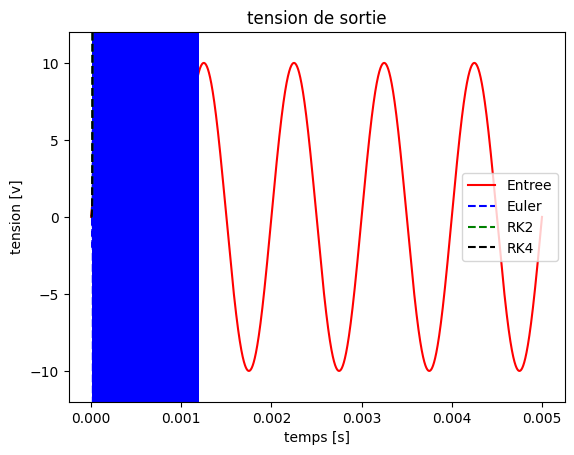

In [15]:
FichierCircuit='data/fRLCpb.txt'
FichierEntree='data/sinus.npy'

t,e=pl.LireFichier(FichierEntree)
#t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

Nous avons testé un filtre RLC de deuxième ordre qui laisse passer les basses fréquences. On a remarqué que les résultats divergent avec différentes méthodes, comme Euler, Runge-Kutta 2 et même Runge-Kutta 4. Cela se produit en raison de la taille du pas de temps (ℎ). Il est crucial de noter que pour des résultats de simulation plus stables, il est nécessaire de ajuster la valeur du pas de tamps h . 

####  4.1.2. Simulation filtre passe bas 2ème ordre avec interpolation :
Les réponses à un signal sinusoïdal pour ce filtre divergent avec toutes les méthodes en raison d'un pas de temps inadéquat. Nous avons envisagé d'interpoler le vecteur d'entrée en utilisant la méthode spline d'ordre 1.
- interpolation Spline d'ordre 1 : 
La spline p(x) est une fonction définie par morceaux par des polynômes d’ordre 1 (ax+b)  , donc : 
<br> 
\[ p_i(x) = \frac{f(x_{i-1}) \cdot (x - x_i)}{x_{i+1} - x_i} + \frac{f(x_i) \cdot (x - x_{i-1})}{x_i - x_{i-1}} \]


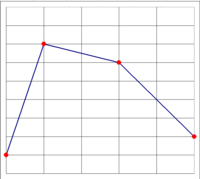


frequence de coupure/resonance: 50329.21210448704


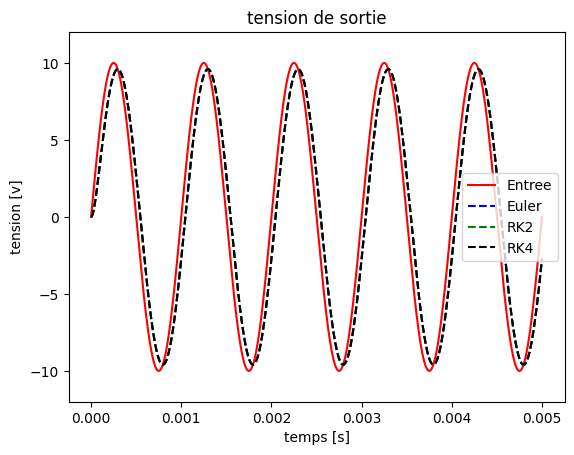

In [16]:
FichierCircuit='data/fRLCpb.txt'
FichierEntree='data/sinus.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

<br>
On remarque qu'avec l'interpolation spline d'ordre 1 que on'a crée du vecteur d'entrée (tension) avec un pas de temps de \(1 \times 10^{-7}\), cela permet d'obtenir une sortie de filtre convergente pour différentes méthodes telles que Euler, Runge-Kutta 2, et Runge-Kutta 4. Ainsi, nous pouvons conclure que pour obtenir une sortie convergente, il est essentiel de diminuer le pas de temps d'interpolation afin d'assurer la stabilité du filtre.

## 4.2.  filtre RLC passe bas :
<br>
L'étude du circuit RLC pour la sortie aux bornes du condensateur nous a amenés à simuler la réponse à un signal sinusoïdal d'un filtre passe-bas du 2ᵉ ordre avec une fréquence de coupure \( f_c = \frac{1}{2\pi\sqrt{LC}} \).

Un filtre passe-bas du 2ᵉ ordre:
est un système ou  qui favorise le passage des composantes d'un signal ayant des fréquences plus basses tout en atténuant les composantes à fréquences plus élevées. Cela signifie que le filtre laisse passer les variations lentes du signal tout en limitant l'impact des variations rapides.

voici le diagramme de bode de ce filtre : 

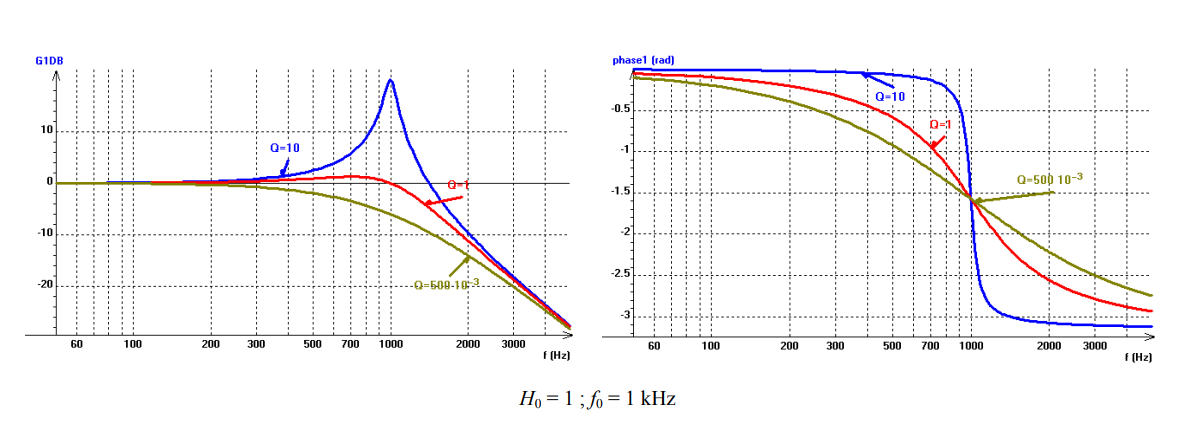

frequence de coupure/resonance: 50329.21210448704


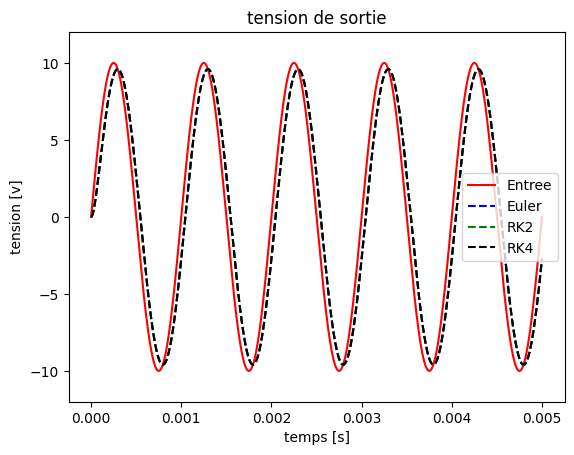

In [17]:
FichierCircuit='data/fRLCpb.txt'
FichierEntree='data/sinus.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

La figure précédente représente la simulation de la réponse de ce filtre passe bas (Circuit RLC R=4700, L=1e-3, C=1e-8) pour une entrée sinus (f=1kh) avec différentes méthodes numériques. À présent, nous allons simuler la réponse de ce filtre à l'aide d'un logiciel pour comparer les deux ensembles de résultats : 

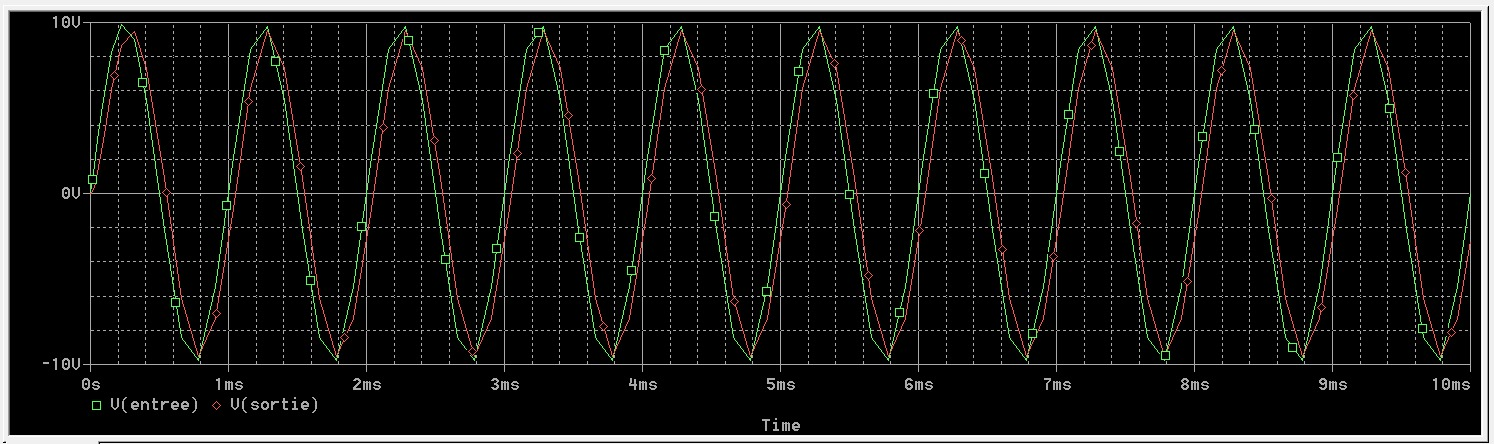

Sur les deux simulations, on voit que le filtre passe-bas du 2ᵉ ordre laisse passer les fréquences inférieures à la fréquence de coupure tout en atténuant les fréquences supérieures.

On remarque bien que les deux simulations que nous avons réalisées, l'une avec des méthodes numériques et l'autre avec un logiciel, sont exactement les mêmes, confirmant ainsi que notre méthode est correcte.

## 4.3.  filtre RLC passe haut :
<br>
L'étude du circuit RLC pour la sortie à travers l'inductance a conduit à la modélisation d'un filtre passe-haut du 2ᵉ ordre. Ce filtre présente une fréquence de coupure définie par \( f = \frac{1}{2\pi\sqrt{LC}} \). Les simulations ont été réalisées pour analyser le comportement fréquentiel du filtre dans différentes configurations. Ci-dessous,

Un filtre passe-haut du 2ᵉ ordre est un système qui privilégie les composantes d'un signal ayant des fréquences plus élevées, tout en atténuant les composantes à fréquences plus basses. En d'autres termes, ce filtre favorise les variations rapides du signal, tout en limitant l'influence des variations lentes.

vous trouverez le diagramme de Bode associé à ce filtre : 


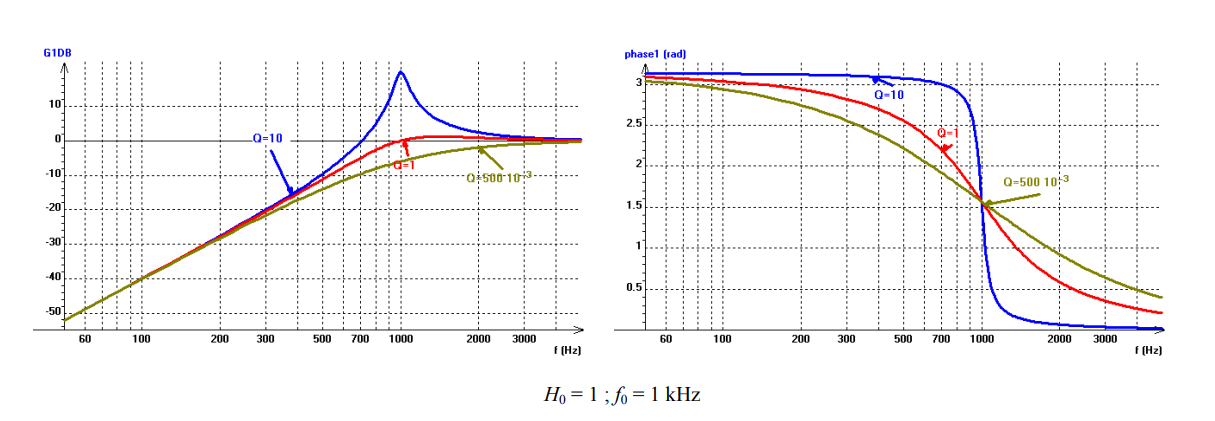

frequence de coupure/resonance: 1452.879207831368


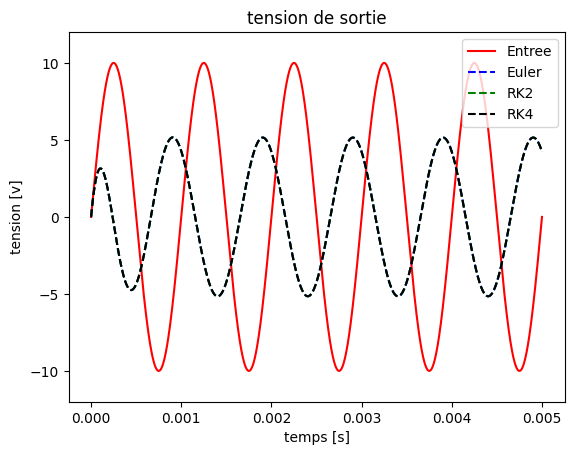

In [18]:
FichierCircuit='data/fRLCph.txt'
FichierEntree='data/sinus.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

La figure précédente représente la simulation de la réponse de ce filtre passe haut (Circuit RLC R=10, L=1e-3, C=1.2e-5) pour une entrée sinus (f=1kh) avec différentes méthodes numériques. À présent, nous allons simuler la réponse de ce filtre à l'aide d'un logiciel pour comparer les deux ensembles de résultats :

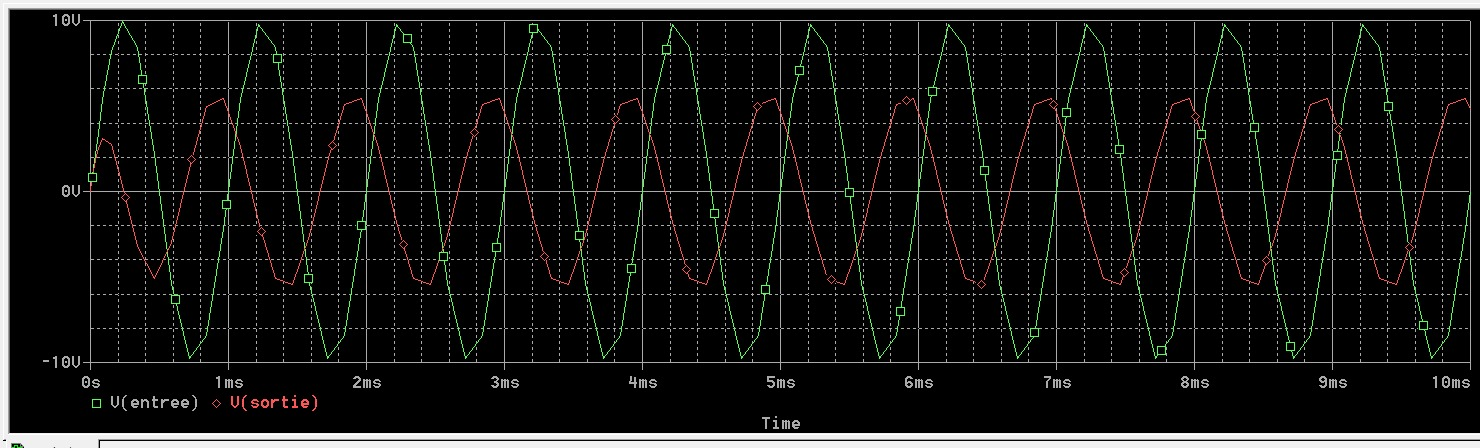

 Voici une simulation de ce filtre passe-haut avec une fréquence de coupure de 1452 Hz pour une entrée sinus de fréquence 1000 Hz. On remarque que le signal filtré présente une amplification des composantes de fréquence supérieure à la fréquence de coupure, tandis que les composantes de fréquence inférieure à la fréquence de coupure sont atténuées.
 
La simulation confirme les résultats que nous avons obtenus avec les différentes méthodes de résolution des équations différentielles.

## 4.4.  filtre RLC Passe bande :
<br>
L'examen de la sortie à travers la résistance dans le circuit RLC a conduit à la création d'un filtre passe-bande du 2ᵉ ordre. La fréquence de coupure de ce filtre est déterminée par \( f = \frac{1}{2\pi\sqrt{LC}} \). Des simulations ont été effectuées pour examiner le comportement fréquentiel du filtre dans diverses configurations.

Un filtre passe-bande du 2ᵉ ordre est un système qui permet sélectivement le passage d'une bande spécifique de fréquences tout en atténuant les fréquences situées à l'extérieur de cette bande. Contrairement aux filtres passe-bas ou passe-haut, qui favorisent respectivement les basses ou hautes fréquences, le filtre passe-bande cible une plage particulière de fréquences pour la transmission, tout en atténuant celles qui se situent en dehors de cette plage.

Vous trouverez ci-dessous le diagramme de Bode qui illustre les caractéristiques de ce filtre passe-bande.

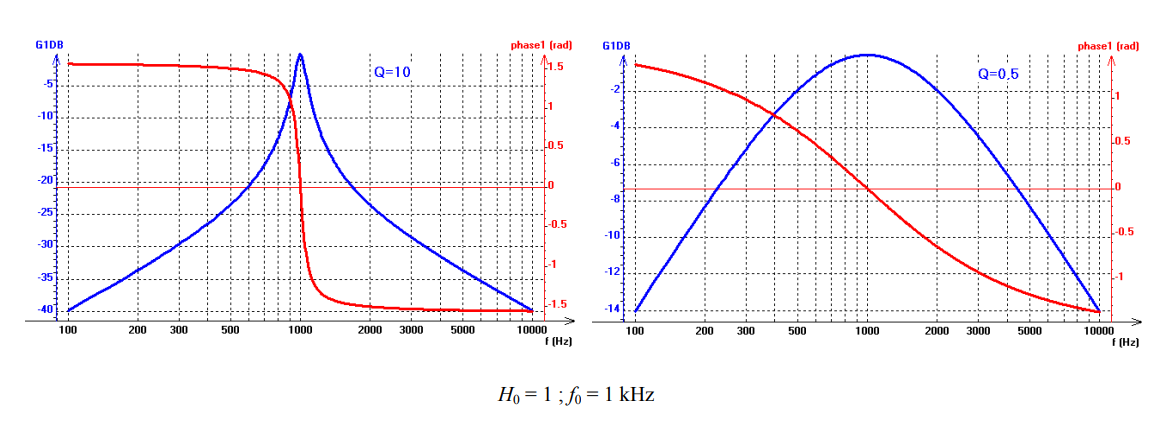

frequence de coupure/resonance: 2250.7907903927653


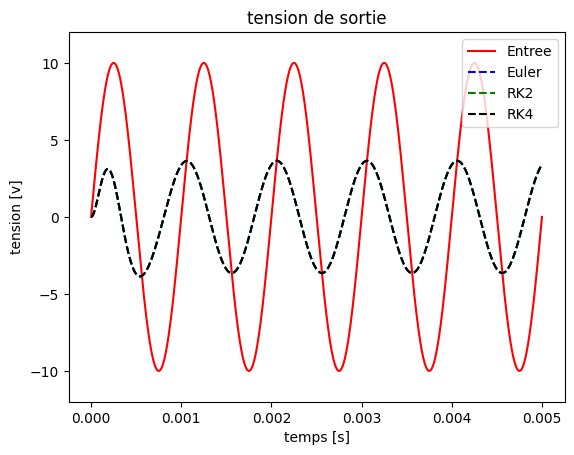

In [19]:
FichierCircuit='data/fRLCpbd.txt'
FichierEntree='data/sinus.npy'

t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree

t1,s1,fc=pl.CalculResultatDirect(FichierCircuit,t,e,1)
t2,s2,fc=pl.CalculResultatDirect(FichierCircuit,t,e,2)
t3,s3,fc=pl.CalculResultatDirect(FichierCircuit,t,e,3)
print(f'frequence de coupure/resonance: {fc}')


plt.plot(t,e,'-r',label='Entree')
plt.plot(t1,s1,'--b', label='Euler')
plt.plot(t2,s2,'--g', label='RK2')
plt.plot(t2,s2,'--k', label='RK4')
plt.title("tension de sortie")
plt.ylim(-12, 12)
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

La figure précédente représente la simulation de la réponse de ce filtre passe bande (Circuit RLC R=10, L=1e-3, C=0.5e-5) pour une entrée sinus (f=1kh) avec différentes méthodes numériques. À présent, nous allons simuler la réponse de ce filtre à l'aide d'un logiciel pour comparer les deux ensembles de résultats :

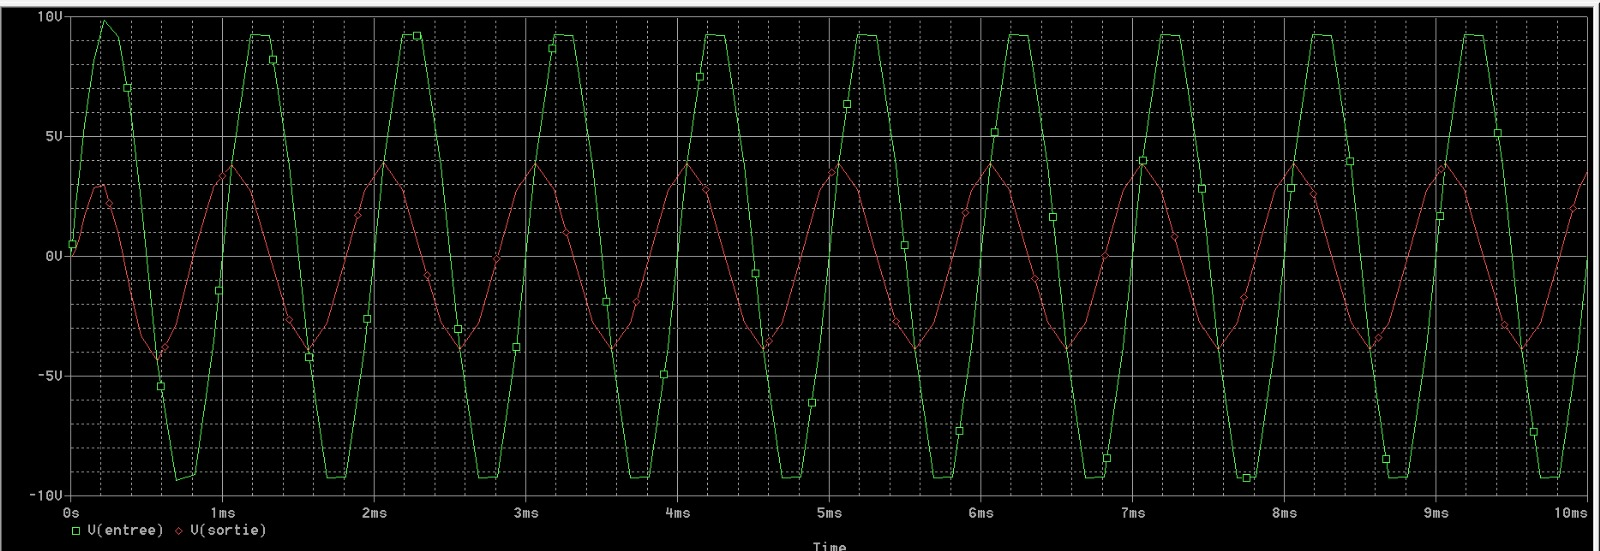

Lors de la simulation d'un filtre passe-bande () avec une fréquence de coupure de 2000 Hz et une fréquence de signal sinus de 1000 Hz, on remarque que le signal est filtré de manière sélective, ne laissant passer que les fréquences de la bande spécifiée.

La simulation confirme les résultats que nous avons obtenus avec les différentes méthodes de résolution des équations différentielles.


# 5. Étude de la combinaison de plusieurs circuits en cascade

Considérons qu'un suiveur AOP est intégré entre chaque circuit, les circuits seront donc isolés en impédance : ceci nous permet de simuler le système en utilisant la tension de sortie d'un circuit en tant que la tension d'entrée du circuit suivant




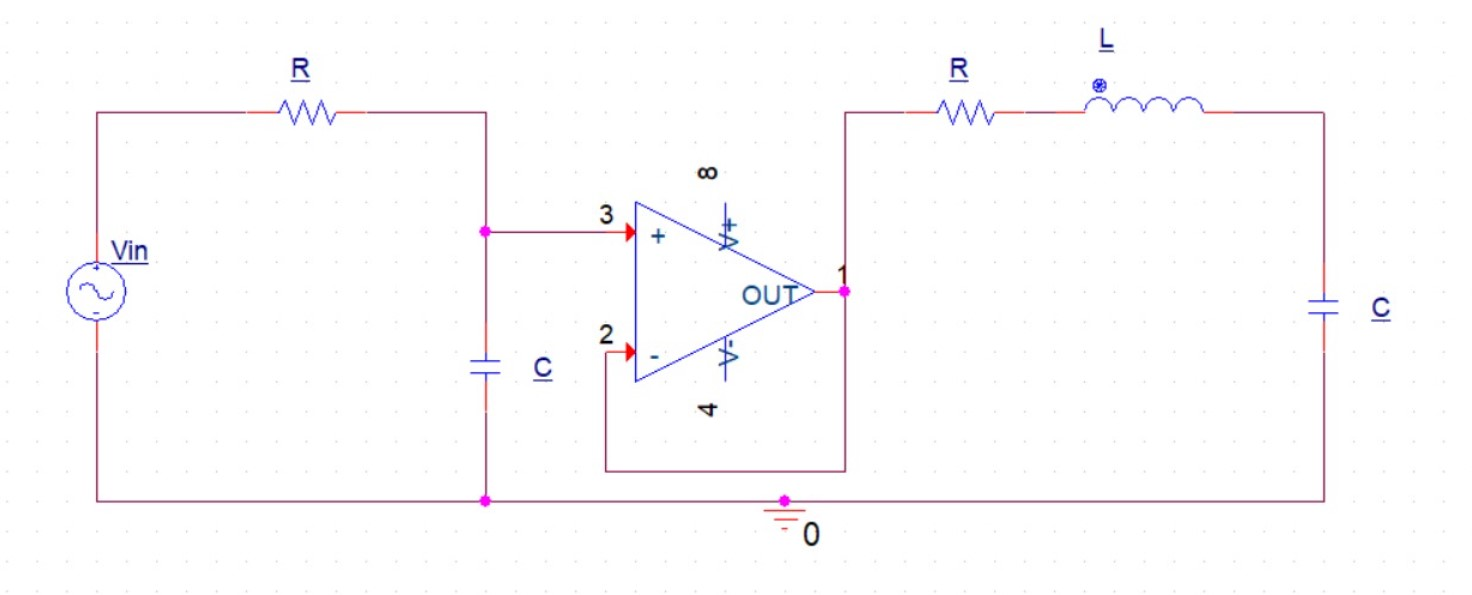






Pour procéder à cela, nous allons donc utiliser un metafichier texte qui contient l'emplacement des différents fichiers caractéristiques des circuits organisés en ligne comme cela: 



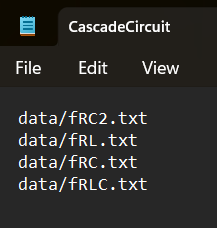

NB: les lignes vides causent le non-fonctionnement de la fonction ResultatCascadeCircuit, il faut donc s'assurer qu'il n'y a pas de lignes vides après le dernier circuit



Apres le chargement et l'interpolation de l'entrée, nous utilisons la fonction ResultatCascadeCircuit qui nous renverra une matrice qui à chaque colonne associe la tension de sortie d'un circuit (la colonne 0 étant la tension d'entrée initiale, la colonne 1 étant la tension de sortie du premier circuit et l'entrée du deuxième circuit et ainsi de suite...)



In [20]:
#Chargement le la tension d'entree et des characteristiques des circuits
FichierEntree='data/sinus.npy'
FichierMetaCircuit='data/CascadeCircuit.txt'

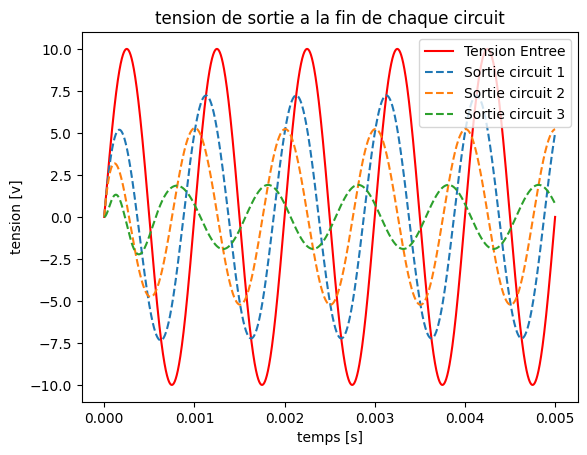

In [21]:
t,e=pl.LireFichier(FichierEntree)
t,e,h=pl.InterpolationSpline1(t, e, 1e-7)   #interpolation de l'entree

t,MatriceV,fc=pl.ResultatCascadeCircuit(FichierMetaCircuit,t,e,3)

plt.plot(t,MatriceV[:,0],'-r', label=f'Tension Entree')
for i in range(1,MatriceV.shape[1]):
    
    
    plt.plot(t,MatriceV[:,i],'--', label=f'Sortie circuit {i}')
    
plt.title("tension de sortie a la fin de chaque circuit")
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

# 6. Pôle Interactions Utilisateur

## 6.1. chargement des données:

Pour commencer, veuillez charger l'emplacement de vos fichiers d'information.
Veuillez ensuite enregistrer la méthode de résolution que vous souhaitez utiliser : 1 pour Euler, 2 pour Runge Kutta 2 (Heun), 3 pour Runge Kutta 4.
Vous pouvez aussi enregister votre entree instantanement avec la fonction SauvegardeFonction.

In [22]:
FichierTensionEntree='data/sinus.npy'
FichierInformationsCircuitprimaire='data/fRC_pb.txt'
FichierCascadeCircuits='data/CascadeCircuit.txt'

Methode=1

## 6.2. Interpolation si necessaire:
Si le pas de l'entrée n'est pas assez petit pour assurer une convergence des méthodes, il faudra procéder à l'interpolation de la tension d'entrée :
le pas nécessaire à la convergence doit être approximativement plus petit que 2 fois la constante de temps du circuit.

In [23]:
t,Vin=pl.LireFichier(FichierTensionEntree)
h=(t[-1]-t[0])/(len(t)-1)
print(f'le pas de temps initial est H= {h} s')

t,Vin,h=pl.InterpolationSpline1(t, Vin, 1e-6)   
print(f'le pas de temps final apres interpolation est H= {h} s')

le pas de temps initial est H= 5.000500050005001e-07 s
le pas de temps final apres interpolation est H= 5.000500050005001e-07 s


## 6.3. Resultat du circuit Primaire:

frequence de coupure/resonance: 338.62753849339435 hz


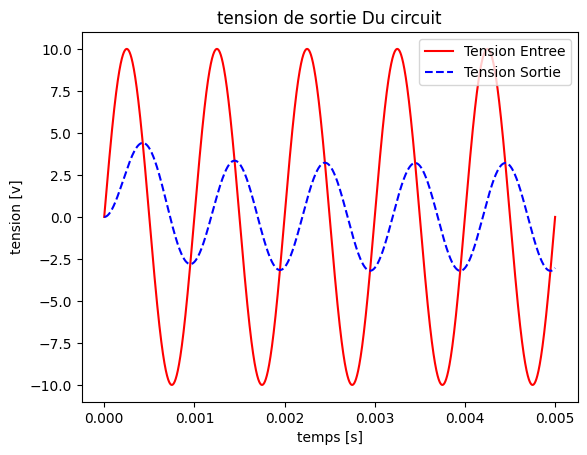

In [24]:
t,Vout,fc=pl.CalculResultatDirect(FichierInformationsCircuitprimaire,t,Vin,Methode)
print(f'frequence de coupure/resonance: {fc} hz')


plt.plot(t,Vin,'-r',label='Tension Entree')
plt.plot(t,Vout,'--b',label='Tension Sortie')
plt.title("tension de sortie Du circuit")
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

## 6.4. Resultat du circuit Complexe:
Le code ci-dessous affiche la tension de sortie à la fin de chaque circuit, on peut alors étudier l'évolution de cette dernière

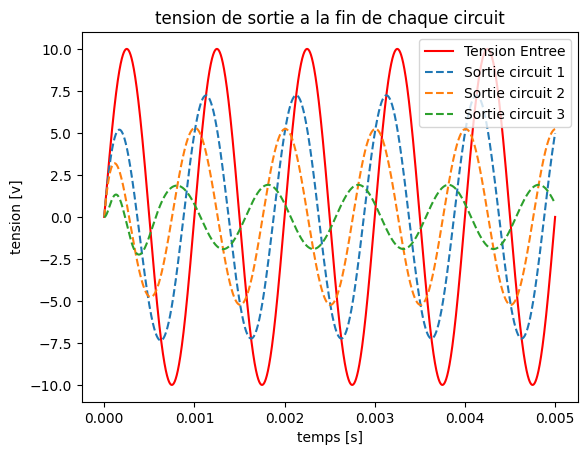

In [25]:
t,MatriceVout,fc=pl.ResultatCascadeCircuit(FichierCascadeCircuits,t,Vin,Methode)

plt.plot(t,MatriceVout[:,0],'-r', label=f'Tension Entree')
for i in range(1,MatriceVout.shape[1]):
    
    
    plt.plot(t,MatriceVout[:,i],'--', label=f'Sortie circuit {i}')
    
plt.title("tension de sortie a la fin de chaque circuit")
plt.xlabel("temps [s]")
plt.ylabel("tension [v]")
plt.legend()
plt.show();

# 7. Conclusion:


<style>
    body {
        font-family: 'Arial', sans-serif;
        background-color: #f4f4f4;
        color: #333;
    }

    #title {
        text-align: center;
        font-size: 24px;
        font-weight: bold;
        color: #1f497d;
    }

    #sub-title {
        text-align: center;
        font-size: 18px;
        color: #1f497d;
    }

    #logo {
        display: block;
        margin: auto;
        margin-top: 20px;
        width: 40%;
    }

    #project-title {
        text-align: center;
        font-size: 28px;
        font-weight: bold;
        color: #1f497d;
        margin-top: 20px;
    }

    #authors {
        text-align: center;
        font-size: 16px;
        margin-top: 10px;
    }

    #footer {
        text-align: right;
        font-size: 14px;
        margin-top: 20px;
    }
</style>

<div style="text-align:center">
    ![WhatsApp Image 2023-12-22 à 16.38.42_7c2b3663.jpg](<attachment:WhatsApp Image 2023-12-22 à 16.38.42_7c2b3663.jpg>)
</div>

# <div id="title">Sorbonne Université</div>
## <div id="sub-title">Licence d’Électronique, énergie électrique, automatique (EEA)</div>
### <div id="sub-title">Méthodes Numériques en Python</div>
<style>
    .center {
        display: flex;
        justify-content: center;
        align-items: center;
        height: 300px; /* Adjust the height as needed */
    }
</style>


# <div id="project-title">Projet sur Python : Simulation des circuits RLC</div>

---

## <div id="authors">Réalisé par :</div>
- Djamel BOUYA
- Massyl ADJAL
- Faycal CHEMLI
- MAZIZ Abdeslam

---

<blockquote><p id="footer" align="right">2023-2024</p></blockquote>

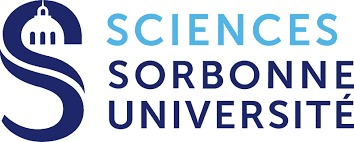